#Parcial 1 Señales y Sistemas
##Pregunta 1:
La distancia media entre 2 señales periódicas $x_1(t) \in \mathbb{R,C}$ y $x_2(t) \in \mathbb{R,C}$; se puede expresar a partir de la potencia media de la diferencia entre ellas:

$d^2(x_1,x_2)=\overline{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt$

Sea $x_1(t)$ y $x_2(t)$ dos señales definidas como:

$x_1(t)=Ae^{-jnω_0t}$

$x_2(t)=Be^{-jmω_0t}$

Con $ω_0=\frac{2π}{T}$ ; $T,A,B \in \mathbb{R}^+$ y $n,m \in \mathbb{Z}$. Determine la distancia entre las dos señales. Compruebe sus resultados con Python.

###R=/
Si la distancia media entre las 2 señales es:

$d^2(x_1,x_2)=\overline{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt$

Pero nosotros sabemos que:

$\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt=\overline{P}_e$

Y $\overline{P}_e$ se puede calcular también por:

$\overline{P}_e=\overline{P}_{x_1}-\frac{2}{T}∫_Tx_1(t)x_2^*(t)dt+\overline{P}_{x_2}$

Es posible calcular cada una por a parte asi:


In [409]:
import sympy as sym #importamos sympy para hacer integrales simbolicas
from IPython.display import display #importo display para mostrar resultados bonitos

T = sym.Symbol("T", real=True, positive=True) #real positivo
A = sym.Symbol("A", real=True, positive=True) #real positivo
n = sym.Symbol("n", integer=True) #entero
t = sym.Symbol("t")
omega = 2*sym.pi/T #creamos las variables simbolicas T,A,n,t y definimos nuestra fecuencia angular omega

x1 = A*sym.exp(-sym.I * n * omega * t)
x1_conj = sym.conjugate(x1)

display(x1 , x1_conj)


A*exp(-2*I*pi*n*t/T)

A*exp(2*I*pi*n*conjugate(t)/T)

In [410]:
px1 = (1/T) * sym.integrate(x1*x1_conj,(t, -T/2, T/2)) #hacemos la integral simbolica

display(px1) #que nos muestre el resultado

A**2

In [411]:
#Fue un éxito, ahora hagamos lo propio con x2
B = sym.Symbol("B", real=True, positive=True) #real positivo
m = sym.Symbol("m", integer=True) #entero

x2 = B*sym.exp(-sym.I * m * omega * t)
x2_conj = sym.conjugate(x2)

display(x2 , x2_conj) #a ver que tal quedo

B*exp(-2*I*pi*m*t/T)

B*exp(2*I*pi*m*conjugate(t)/T)

In [412]:
px2 = (1/T) * sym.integrate(x2*x2_conj,(t, -T/2, T/2)) #hacemos la integral simbolica

display(px2) #que nos muestre el resultado

B**2

Listas las integrales sencillas, ahora vamos a intentar con la integral que tiene 2 casos posibles:



In [413]:
integ = -(2/T)*sym.integrate(x1*x2_conj,(t, -T/2, T/2)) #integral simbolica

display(integ) #a ver

-2*Piecewise((A*B*T, Eq(m, n) | (Eq(m, 0) & Eq(m, n)) | (Eq(m, 0) & Eq(n, 0)) | (Eq(m, n) & Eq(n, 0)) | (Eq(m, 0) & Eq(m, n) & Eq(n, 0))), (-I*A*B*T*exp(I*pi*m)/(2*pi*m*exp(I*pi*n) - 2*pi*n*exp(I*pi*n)) + I*A*B*T*exp(-I*pi*m)/(2*pi*m*exp(-I*pi*n) - 2*pi*n*exp(-I*pi*n)), True))/T

Aunque nos muestra algo raro el resultado, resulta sencillo notar que:

# Caso 1:
$n = -m$ o $n=0$ y $m=0$

$-\frac{2ABT}{T}=-2AB$

# Caso 2:
$n \neq -m$, $n \neq 0$ y $m \neq 0$

$-\frac{2(-\frac{iABTe^{iπm}}{2πme^{iπn}-2πne^{iπn}}+\frac{iABTe^{-iπm}}{2πme^{-iπn}-2πne^{-iπn}})}{T}=0$

Como el problema nos dice que

$d^2(x_1,x_2)=\overline{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt=\overline{P}_e$

Luego

$d(x_1,x_2)=\sqrt{\overline{P}_e}$

Es decir que si $n = -m$ o $n=0$ y $m=0$

$d(x_1,x_2)=\sqrt{\overline{P}_e}=\sqrt{A^2+B^2-2AB}$

Y si $n \neq -m$, $n \neq 0$ y $m \neq 0$

$d(x_1,x_2)=\sqrt{\overline{P}_e}=\sqrt{A^2+B^2}$



## Pregunta 2:
Encuentre la señal en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de 5kHz y 4 bits de capacidad de representación, aplicado a la señal continua:

$x(t)=3cos(1000πt)+5sin(3000πt)+10cos(11000πt)$

Realizar la simulación del proceso de discretización (incluyendo al menos 3 periodos de $x(t)$). En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

# R=/
Para empezar calculamos el periodo de la señal $x(t)$, el cual es el minimo común multiplo de los periodos de las otras señales:

$m.c.m(\frac{1}{500},\frac{1}{1500},\frac{1}{5500})=\frac{1}{M.c.d(500,1500,5500)}=\frac{1}{500}$

Con lo que la frecuencia de la señal es $500 Hz$


Text(0, 0.5, '$x(t)$')

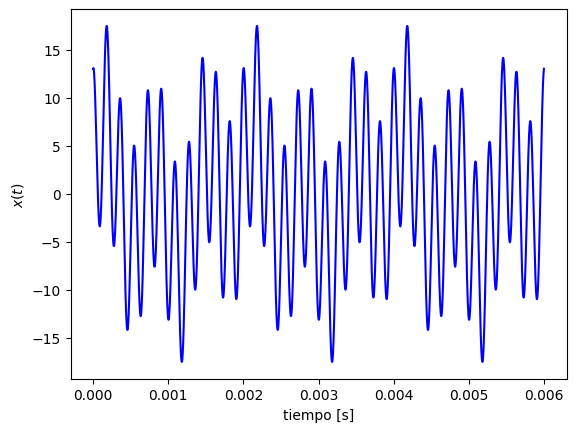

In [414]:
import numpy as np #importamos numpy para simular señales discretas
import matplotlib.pyplot as plt #librería para gráficas básicas en python

tin=0 #tiempo inicial
f=500 # frecuencia de la señal
T=1/f #periodo de la señal
tfin=T*3 #tiempo final, usamos tres veces el periodo obtenido ya que queremos ver 3 ciclos
fcont=f*5000 #vamos a simular como luce en tiempo continuo la señal para hacer la comparación
tcont=1/fcont
tveccont = np.arange(tin, tfin+tcont, tcont) #ponemos tiempo final más t muestreo para que si tome los 3 ciclos, ya que si no el ultimo queda incompleto
xcont= 3*np.cos(1000*np.pi*tveccont) + 5*np.sin(3000*np.pi*tveccont) + 10*np.cos(11000*np.pi*tveccont) #nuestra señal en continuo
plt.plot(tveccont,xcont,"b-",label="señal pedida") #a ver como quedo
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')

Ahora vamos a ver como luce la señal discretizada con la condicion dada de $F_s=5000Hz$:

Text(0, 0.5, '$x(t)$')

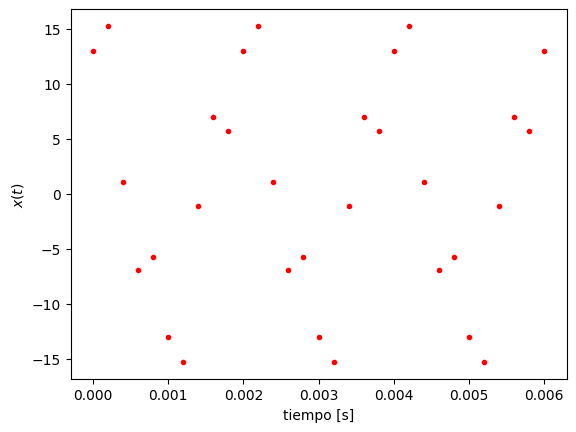

In [415]:
Fs=5000
Ts=1/5000
tvecdis1 = np.arange(tin, tfin+Ts, Ts)
xdis1 = 3*np.cos(1000*np.pi*tvecdis1) + 5*np.sin(3000*np.pi*tvecdis1) + 10*np.cos(11000*np.pi*tvecdis1) #nuestra señal en discreto con la frecuencia de muestreo que nos dieron
plt.plot(tvecdis1,xdis1,"r.",label="señal discretizada con Fs=5000Hz") #a ver como quedo
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')

Aqui se nota que como la frecuencia de muestreo que nos dieron no cumple el Teorema de Nyquist, lo que alcanza a ver nuestro conversor de la señal es muy minimo, y es insuficiente para reconstruir la señal.
Ya a partir de aqui podriamos proponer una solución, pero el ejercicio pide que primero se simule la cuantización y por consiguiente digitalización con esas especificaciones que es lo que haremos a continuación:

Text(0, 0.5, '$x_{cs}(t)$')

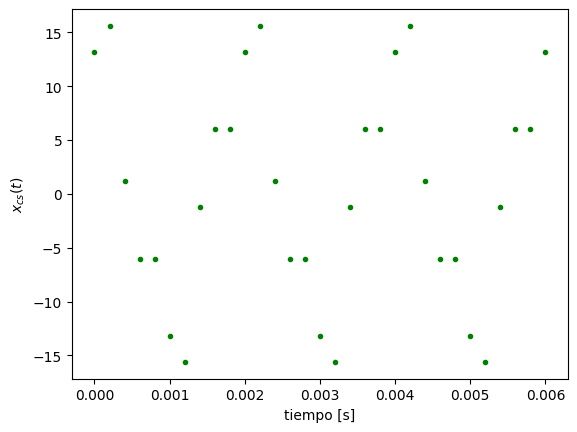

In [416]:
#muy bien, ahora digitalizamos la señal
from scipy.spatial.distance import cdist #esto se copio y se pego de uno de los cuadernos facilitados por el profesor, usaremos las funciones definidas por él para nuestra solución

vcuant=np.linspace(-18,18,2**4) #creamos un vector que define que valores puede tomar nuestra función en el eje y, el número de muestras viene dado por 2**nbits, en nuestro problema, 4 bits
#función cuantización punto a punto

#esta función se copio y se pego como venia de un cuaderno facilitado por el profe
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]
for i in range(xdis1.shape[0]): #este for se copio y se pego tal cual del mismo cuaderno, es para que vaya comparando cada elemento de la señal discretizada con el vector que define que estados puede tomar la señal y vaya generando un vector con los valores digitalizados
   if i==0: #primera muestra
     senalq = my_cuantizador(xdis1[i],vcuant)
   else:
     senalq = np.append(senalq,my_cuantizador(xdis1[i],vcuant))

plt.plot(tvecdis1,senalq,"g.",label="señal digitalizada con Fs=5500Hz y 4 bits") #a ver como quedo x3
plt.xlabel('tiempo [s]')
plt.ylabel('$x_{cs}(t)$')

Ahora vamos a proponer una solución mejor al problema: necesitamos una mayor frecuencia de muestreo que por lo menos cumpla Nyquist, es decir:

$F_s \geq 2Fmax$

Como la $Fmax$ de la señal es $5500Hz$, para que la señal digitalizada luzca bien proponemos un $Fs=200*Fmax$

Text(0, 0.5, '$x(t)$')

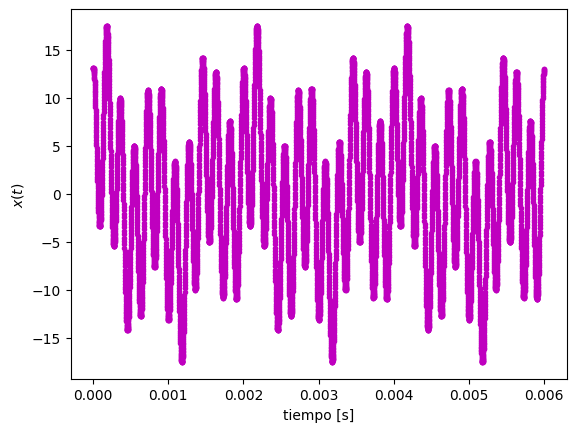

In [417]:
Fmax = 5500
Fs2 = 200*Fmax
Ts2 = 1/Fs2
tvecdis2 = np.arange(tin, tfin+Ts2, Ts2)
xdis2 = 3*np.cos(1000*np.pi*tvecdis2) + 5*np.sin(3000*np.pi*tvecdis2) + 10*np.cos(11000*np.pi*tvecdis2) #nuestra señal en discreto con la frecuencia de muestreo que proponemos
plt.plot(tvecdis2,xdis2,"m.",label="señal discretizada con Fs=200*Fmax") #a ver como quedo
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')

Como vemos, con esta nueva frecuencia de muestreo podemos ver la señal por completo, ahora si la cuantizamos nos queda:

Text(0, 0.5, '$x_{cs}(t)$')

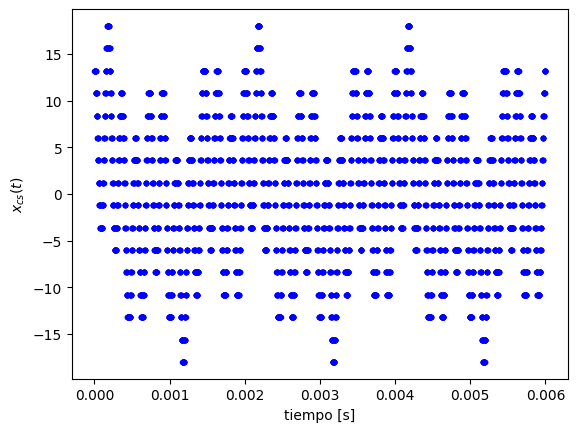

In [418]:
for i in range(xdis2.shape[0]): #este for se copio y se pego tal cual del mismo cuaderno, es para que vaya comparando cada elemento de la señal discretizada con el vector que define que estados puede tomar la señal y vaya generando un vector con los valores digitalizados
   if i==0: #primera muestra
     senalq2 = my_cuantizador(xdis2[i],vcuant)
   else:
     senalq2 = np.append(senalq2,my_cuantizador(xdis2[i],vcuant))

plt.plot(tvecdis2,senalq2,"b.",label="señal digitalizada con Fs=200*Fmax y 4 bits") #a ver como quedo x1000
plt.xlabel('tiempo [s]')
plt.ylabel('$x_{cs}(t)$')

Al ver la señal digitalizada no es muy posible visualizar como era originalmente, para hacerla más fiel a la original seria necesario utilizar más bits, con un incremento de tan solo 1 bit se obtendria:

Text(0, 0.5, '$x_{cs}(t)$')

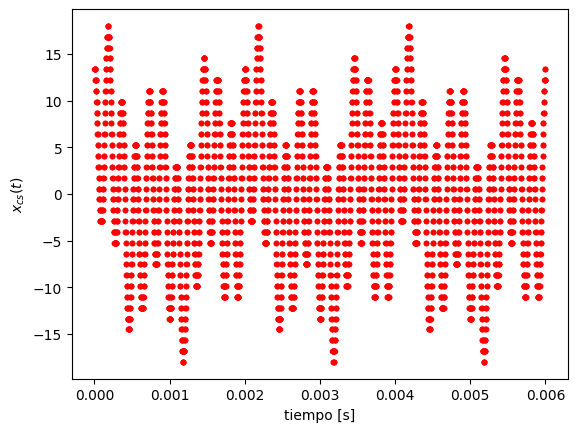

In [419]:
vcuant2=np.linspace(-18,18,2**5) #creamos un vector que define que valores puede tomar nuestra función en el eje y, el número de muestras viene dado por 2**nbits, en nuestra solución, 5 bits
for i in range(xdis2.shape[0]): #este for se copio y se pego tal cual del mismo cuaderno, es para que vaya comparando cada elemento de la señal discretizada con el vector que define que estados puede tomar la señal y vaya generando un vector con los valores digitalizados
   if i==0: #primera muestra
     senalq3 = my_cuantizador(xdis2[i],vcuant2)
   else:
     senalq3 = np.append(senalq3,my_cuantizador(xdis2[i],vcuant2))

plt.plot(tvecdis2,senalq3,"r.",label="señal digitalizada con Fs=200*Fmax y 5 bits") #a ver como quedo x10000
plt.xlabel('tiempo [s]')
plt.ylabel('$x_{cs}(t)$')

Esta es una mejor solución al problema, y es la que en mi opinión es mejor para muchos casos. Esta solución tendra que volverse mejor y más precisa en función de para que nos la soliciten.

## Pregunta 3:
Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t \in [t_i, t_f]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

$c_n=\frac{1}{(t_i-t_f)n^2ω_0^2} ∫_{t_i}^{t_f}x''(t)e^{-jnω_0t}dt$  ;  $n \in \mathbb{Z}$

¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?

#R=/
Si utilizamos todos los armónicos de Fourier, entonces:

$x(t)= \sum_{n=-\infty}^{\infty} C_n e^{j n \omega_0 t}$

Luego al derivar una vez obtenemos:

In [420]:
C_n = sym.Symbol("C_n")
omega_0 = sym.Symbol("omega_0")
xdet = sym.summation(C_n*sym.exp(sym.I*n*omega_0*t), (n,-sym.oo, sym.oo)) #definimos la sumatoria de antes
display(xdet) #a ver como queda

Sum(C_n*exp(I*n*omega_0*t), (n, -oo, oo))

In [421]:
derx = sym.diff(xdet,t) #derivamos una vez
display (derx) #cuanto da

Sum(I*C_n*n*omega_0*exp(I*n*omega_0*t), (n, -oo, oo))

Y al derivar por segunda vez obtenemos:

In [422]:
derx2 = sym.diff(derx,t) #derivamos otra vez
display (derx2) #cuanto da

Sum(-C_n*n**2*omega_0**2*exp(I*n*omega_0*t), (n, -oo, oo))

De lo obtenido en esta derivada podemos crear una variable $\tilde{C_n}$ tal que:

$\tilde{C_n}=-C_nn^2ω_0^2$

Esta $\tilde{C_n}$ puede calcularse como con los coeficientes de Fourier asi:

$\tilde{C_n}=\frac{1}{T}∫_Tx''(t)e^{-jnω_0t}$

Si despejamos esta $\tilde{C_n}$ en nuestro $C_n$ original obtenemos:

$-C_nn^2ω_0^2=\frac{1}{T}∫_Tx''(t)e^{-jnω_0t}$

Luego:

$C_n=-\frac{1}{(t_f - t_i)n^2ω_0^2}∫_{t_{i}}^{t_{f}} x''(t)e^{-jnω_0t}$

$C_n=\frac{1}{(t_i - t_f)n^2ω_0^2}∫_{t_{i}}^{t_{f}} x''(t)e^{-jnω_0t}$

Que es exactamente lo mismo que queriamos obtener.

Sin embargo esa no es la única definición de la serie de Fourier. Si queremos podemos hacer lo mismo con su definición trigonométrica la cual es:

$x(t)= \sum_{n=0}^{\infty} a_n Cos(nω_0t)+b_nSin(nω_0t)$

Al derivarla una vez obtenemos:

In [423]:
a_n = sym.Symbol("a_n")
b_n = sym.Symbol("b_n")
xtrig = sym.summation((a_n*sym.cos(n*omega_0*t)) + (b_n*sym.sin(n*omega_0*t)), (n,0, sym.oo)) #definimos la sumatoria de antes
display(xtrig) #a ver como queda

Sum(a_n*cos(n*omega_0*t) + b_n*sin(n*omega_0*t), (n, 0, oo))

In [424]:
dertx = sym.diff(xtrig,t) #derivamos una vez
display (dertx) #cuanto da

Sum(-a_n*n*omega_0*sin(n*omega_0*t) + b_n*n*omega_0*cos(n*omega_0*t), (n, 0, oo))

Y al derivar otra vez obtenemos:

In [425]:
dertx2 = sym.diff(dertx,t) #derivamos una vez más
display (dertx2) #cuanto da

Sum(-a_n*n**2*omega_0**2*cos(n*omega_0*t) - b_n*n**2*omega_0**2*sin(n*omega_0*t), (n, 0, oo))

Nuevamente nombramos un $\tilde{a_n}$ y un $\tilde{b_n}$ que se pueden calcular:

$\tilde{a_n}=\frac{2}{T}∫_Tx''(t)Cos(nω_0t)dt$

Despejamos $\tilde{a_n}$ en $a_n$:

$-a_nn^2ω_0^2=\frac{2}{(tf-ti)}∫_{t_i}^{t_f}x''(t)Cos(nω_0t)dt$

$a_n=\frac{2}{(ti-tf)n^2ω_0^2}∫_{t_i}^{t_f}x''(t)Cos(nω_0t)dt$

Y para $\tilde{b_n}$:

$\tilde{b_n}=\frac{2}{T}∫_Tx''(t)Sin(nω_0t)dt$

Despejamos $\tilde{b_n}$ en $b_n$

$-b_nn^2ω_0^2=\frac{2}{(tf-ti)}∫_{t_i}^{t_f}x''(t)Sin(nω_0t)dt$

$b_n=\frac{2}{(ti-tf)n^2ω_0^2}∫_{t_i}^{t_f}x''(t)Sin(nω_0t)dt$


## Pregunta 4:

Encuentre el espectro de Fourier, su parte real, imaginaria, magnitud, fase, y el error relativo para $n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5 \}$, a partir de $x''(t)$ para la señal  $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$. Presente las simulaciones de Python respectivas.

#R=/
La función se definio a trozos así:

$
x(t) = \begin{cases}
0, & -\frac{T}{2} \leq t \leq -d2  \\
\frac{At}{d2-d1} + \frac{Ad2}{d2-d1}, & -d2 \leq t \leq -d1  \\
-\frac{At}{d1}, & -d1 \leq t \leq 0  \\
\frac{At}{d1}, & 0 \leq t \leq d1  \\
\frac{At}{d1-d2} + \frac{Ad2}{d2-d1}, & d1 \leq t \leq d2  \\
0, & d2 \leq t \leq \frac{T}{2}  \\
\end{cases}
$

Lo cual luce asi:

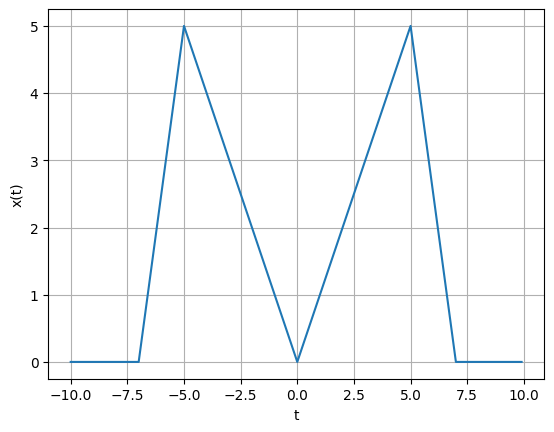

In [426]:
T = 20 #periodo de la señal
A = 5 #altura de la señal
d2 = 7 #d2<t/2 según la gráfica original
d1 = 5 #d1<d2
Fmu = 200*1/T #frecuencia de muestreo
Tmu = 1/Fmu #periodo de muestreo
vect = np.arange(-T/2,T/2,Tmu) #vector de tiempo
vecx = np.zeros(len(vect)) #vector función lleno de tantos ceros como elementos tenga vect
vecx[(vect>=-d2) & (vect<-d1)] = ((A/(d2-d1)) * vect[(vect>=-d2) & (vect<-d1)]) + ((A*d2)/(d2-d1)) #primer intervalo distinto de 0
vecx[(vect>=-d1) & (vect<0)] = (-(A/d1) * vect[(vect>=-d1) & (vect<0)]) #segundo intervalo distinto de 0
vecx[(vect>=0) & (vect<d1)] = ((A/d1) * vect[(vect>=0) & (vect<d1)]) #tercer intervalo distinto de 0
vecx[(vect>=d1) & (vect<d2)] = ((A/(d1-d2)) * vect[(vect>=d1) & (vect<d2)]) + ((A*d2)/(d2-d1)) #cuarto intervalo distinto de 0

plt.plot(vect,vecx)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

Ahora que hemos pintado como luce nuestra señal, vamos a crear nuestras bases conforme a lo solicitado asi:

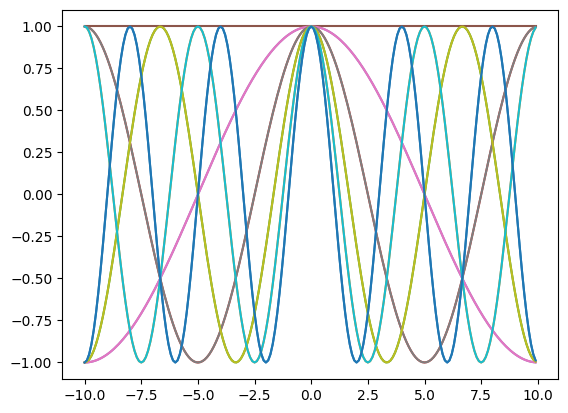

In [427]:
N = 5 #numero armonicos, usamos 5 ya que debemos ir desde -5 hasta +5 según las instrucciones
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
Nm = len(vect)
phin = np.zeros((Nm,2*N+1),dtype=np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*vect)#base de fourier en el intervalo de interés
plt.plot(vect,phin)
plt.show()

El espectro de Fourier $C_n$ se calculo a mano a partir de $x''(t)$ y dio:

$C_n=-\frac{TACos(nω_0d2)}{2π^2n^2(d2-d1)}+\frac{TACos(nω_0d1)}{2π^2n^2(d2-d1)}+\frac{TACos(nω_0d1)}{2π^2n^2d1}-\frac{TA}{2π^2n^2d1}$

In [428]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = -((T*A*np.cos(nv*wo*d2))/(2*(nv**2)*(np.pi**2)*(d2-d1))) + ((T*A*np.cos(nv*wo*d1))/(2*(nv**2)*(np.pi**2)*(d2-d1))) + ((T*A*np.cos(nv*wo*d1))/(2*(nv**2)*(np.pi**2)*(d1))) - ((T*A)/(2*(nv**2)*(np.pi**2)*(d1)))
Cn[N] = ((A*d2)/(T)) # nivel dc C_0

/tmp/ipython-input-1837631497.py:4: RuntimeWarning: divide by zero encountered in divide
  Cn = -((T*A*np.cos(nv*wo*d2))/(2*(nv**2)*(np.pi**2)*(d2-d1))) + ((T*A*np.cos(nv*wo*d1))/(2*(nv**2)*(np.pi**2)*(d2-d1))) + ((T*A*np.cos(nv*wo*d1))/(2*(nv**2)*(np.pi**2)*(d1))) - ((T*A)/(2*(nv**2)*(np.pi**2)*(d1)))
/tmp/ipython-input-1837631497.py:4: RuntimeWarning: invalid value encountered in add
  Cn = -((T*A*np.cos(nv*wo*d2))/(2*(nv**2)*(np.pi**2)*(d2-d1))) + ((T*A*np.cos(nv*wo*d1))/(2*(nv**2)*(np.pi**2)*(d2-d1))) + ((T*A*np.cos(nv*wo*d1))/(2*(nv**2)*(np.pi**2)*(d1))) - ((T*A)/(2*(nv**2)*(np.pi**2)*(d1)))


Graficamos el espectro:

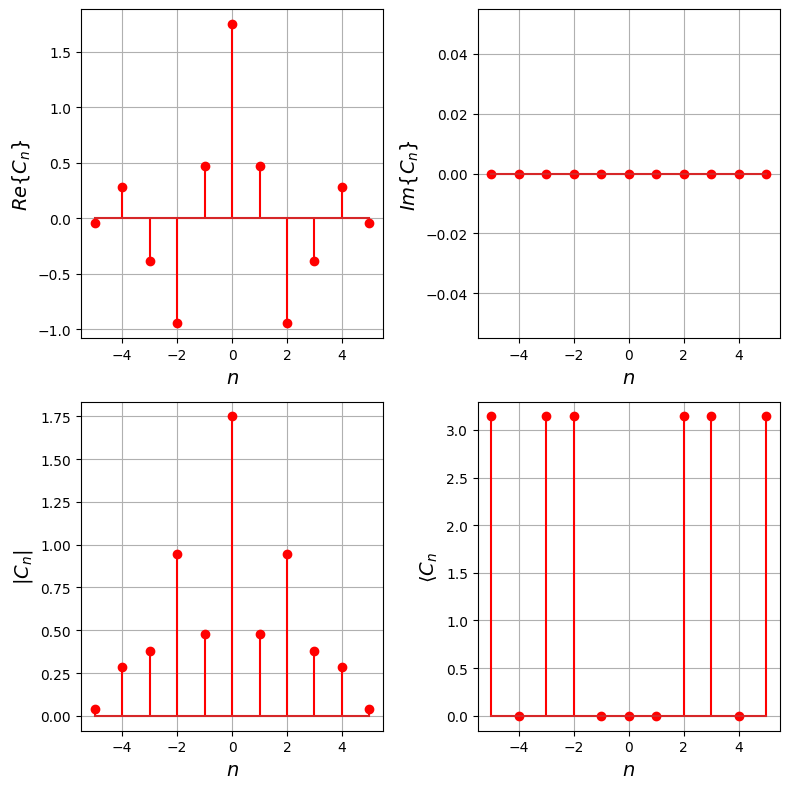

In [429]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Por último nuestra reconstrucción quedaria:

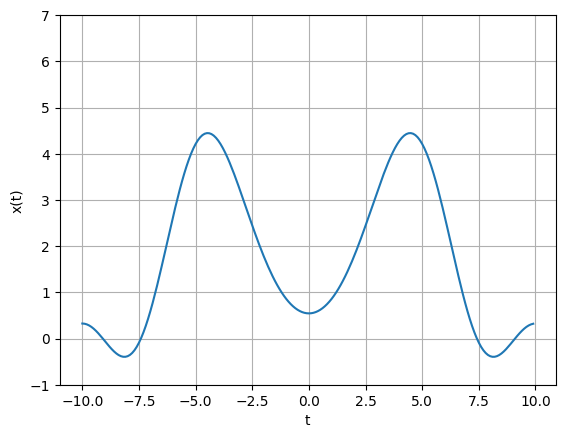

In [430]:
xe = phin.dot(Cn) # dot calcula el producto entre vectores
plt.plot(vect,xe)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.ylim(-1,7)
plt.show()


En el problema se nos pide calcular el espectro por la definición de $x(t)$ y hacer la comparación, al hacer esto se obtuvo:

/tmp/ipython-input-1508223811.py:1: RuntimeWarning: invalid value encountered in divide
  Cn2 = (1/T)*(((2*A*d1*np.sin(nv*wo*d1))/((d2-d1)*nv*wo)) + ((2*A*np.sin(nv*wo*d1))/(nv*wo)) + ((2*A*np.cos(nv*wo*d1))/((nv**2)*(wo**2)*(d2-d1))) - ((2*A*np.cos(nv*wo*d2))/((nv**2)*(wo**2)*(d2-d1))) - ((2*A*d2*np.sin(nv*wo*d1))/((d2-d1)*nv*wo)) - ((2*A)/((nv**2)*(wo**2)*d1)) + ((2*A*np.cos(nv*wo*d1))/((nv**2)*(wo**2)*d1)))
/tmp/ipython-input-1508223811.py:1: RuntimeWarning: divide by zero encountered in divide
  Cn2 = (1/T)*(((2*A*d1*np.sin(nv*wo*d1))/((d2-d1)*nv*wo)) + ((2*A*np.sin(nv*wo*d1))/(nv*wo)) + ((2*A*np.cos(nv*wo*d1))/((nv**2)*(wo**2)*(d2-d1))) - ((2*A*np.cos(nv*wo*d2))/((nv**2)*(wo**2)*(d2-d1))) - ((2*A*d2*np.sin(nv*wo*d1))/((d2-d1)*nv*wo)) - ((2*A)/((nv**2)*(wo**2)*d1)) + ((2*A*np.cos(nv*wo*d1))/((nv**2)*(wo**2)*d1)))


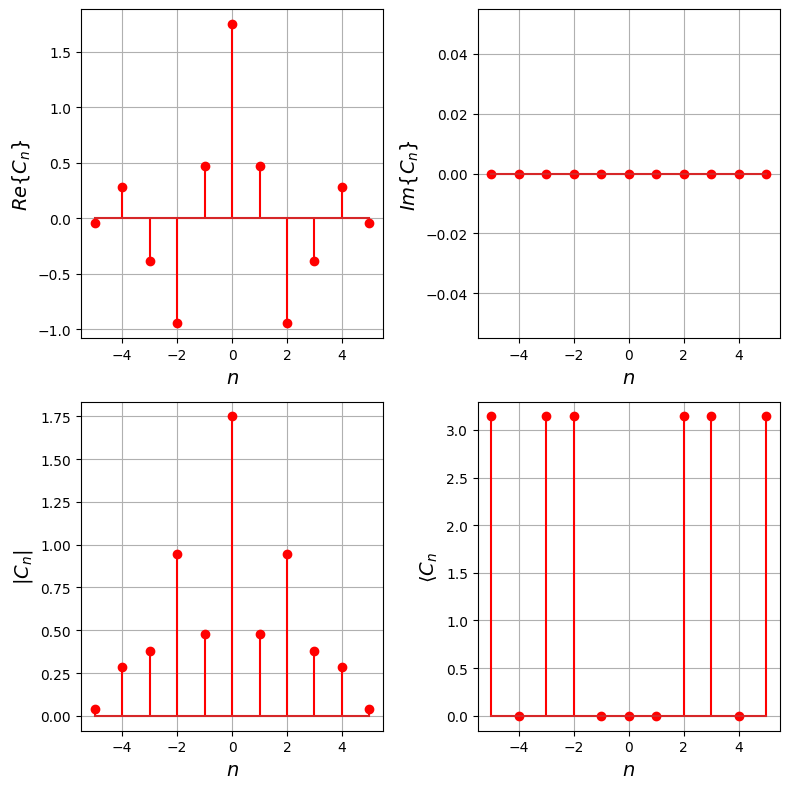

In [431]:
Cn2 = (1/T)*(((2*A*d1*np.sin(nv*wo*d1))/((d2-d1)*nv*wo)) + ((2*A*np.sin(nv*wo*d1))/(nv*wo)) + ((2*A*np.cos(nv*wo*d1))/((nv**2)*(wo**2)*(d2-d1))) - ((2*A*np.cos(nv*wo*d2))/((nv**2)*(wo**2)*(d2-d1))) - ((2*A*d2*np.sin(nv*wo*d1))/((d2-d1)*nv*wo)) - ((2*A)/((nv**2)*(wo**2)*d1)) + ((2*A*np.cos(nv*wo*d1))/((nv**2)*(wo**2)*d1)))
Cn2[N] = ((A*d2)/(T))
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn2), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn2), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn2), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn2), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Y asi la reconstrucción con la definición de $x(t)$ quedaria:

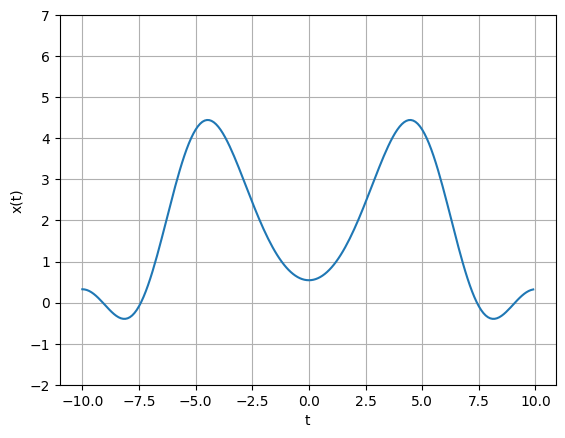

In [432]:
xe2 = phin.dot(Cn2) # dot calcula el producto entre vectores
plt.plot(vect,xe2)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.ylim(-2,7)
plt.show()

También se nos pide medir el error relativo, para esto se usa un código que el profesor dio con anterioridad en uno de los cuadernos:

In [433]:
from ipywidgets import interact,IntSlider
Px = (1/T)*((((A**2)*((-d1**3)-(-d2**3)))/(3*((d2-d1)**2))) + ((A*d2*((d1**2)-(d2**2)))/((d2-d1)**2)) + (((A**2)*(d2**2)*(-d1-(-d2)))/((d2-d1)**2)) + (((A**2)*(-(-d1**3)))/(3*(d1**2))) + (((A**2)*(d1**3))/(3*d1)) + (((A**2)*((d2**3)-(d1**3)))/(3*((d2-d1)**2))) + (((A**2)*d2*((d2**2)-(d1**2)))/((d1-d2)*(d2-d1))) + (((A**2)*(d2**2)*(d2-d1))/(((d2-d1)**2)))) # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(vect,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(vect,vecx,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>